### Calculo de Ratios

#### liquidez
* Razón corriente = Activos corrientes / Pasivos corrientes
* Prueba ácida = (Activo corriente - Inventarios) / Pasivo corriente

#### Solvencia y endeudamiento
* Endeudamiento total = Total de pasivos / Total de activos
* Endeudamiento de largo plazo = Pasivo no corriente / Total de activos
* Cobertura de intereses = EBIT / Gastos por intereses

#### Rentabilidad
* ROA (Return on Assets) = Beneficio neto / Activo total
* ROE (Return on Equity) =  Beneficio neto / Patrimonio neto
* Margen de utilidad = 	Beneficio neto / Ventas (ingresos totales) (escrapeado "Margen del beneficio neto %")
* Rotación de activos = ingresos totales / Total de activos
* Rotación de inventarios = ingresos totales / Inventario

In [1]:
import sqlite3
import pandas as pd
pd.options.display.max_rows = 999

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_anuales")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df = pd.DataFrame(filas, columns=column_names)
df.loc[df["company"] == "ypf-sa", "company"] = "YPF"

In [2]:
indicadores = df.groupby(["informe","seccion","indicador"]).size()

print(indicadores)

informe     seccion            indicador                                                 
balance     activo_corriente   Crecimiento de efectivo y equivalentes                        75
                               Créditos totales                                              75
                               Efectivo restringido                                          29
                               Efectivo y equivalentes                                       75
                               Gastos pagados por adelantado                                 43
                               Inventario                                                    67
                               Inversiones a corto plazo                                     63
                               Otros activos corrientes                                      71
                               Otros créditos                                                46
                               Total de cuenta

In [3]:
# rubros que componen cada seccion
# no se incluye por ejemplo el rubro "otros creditos" ya que forma parte de "Creditos totales"
activo_corriente = [
    "Efectivo y equivalentes",
    "Inversiones a corto plazo",
    "Créditos totales",
    "Inventario",
    "Gastos pagados por adelantado",
    "Otros activos corrientes"
]
activo_no_corriente = [
    "Planta, propiedad y equipo, neto",
    "Inversiones a largo plazo",
    "Activos intangibles",
    "Total de otros activos"
]
pasivo_corriente = [
    "Total de cuentas por pagar",
    "Total de gastos devengados",
    "Préstamos a corto plazo",
    "Parte actual de la deuda a largo plazo/arrendamientos",
    "Total de otros pasivos corrientes"
]
pasivo_no_corriente = [
    "Deuda a largo plazo",
    "Arrendamientos a largo plazo",
    "Total de otros pasivos"
]
patrimonio_neto = [
    "Total de acciones preferentes",
    "Acciones ordinarias y APIC",
    "Ganancias retenidas",
    "Acciones propias y otras",
    "Intereses minoritarios"
]

inventario = ["Inventario"]

EBIT = ["EBIT"]
	
intereses = ["Total de gastos de intereses"]

beneficio_neto = ["Beneficio neto"]

mbn = ["Margen del beneficio neto %"]

ing = ["Ingresos totales"]

In [4]:
# features de indicadores ya escrapeados

indicadores_scrapeados = [
  "Crecimiento de efectivo y equivalentes",
  "Crecimiento de activos totales",
  "Crecimiento del pasivo total",
  "Crecimiento de la deuda total",
  "Crecimiento del beneficio neto",
  "Crecimiento del EBITDA",
  "Crecimiento de los ingresos totales"
]

In [5]:
ac = pd.pivot_table(df[df.indicador.isin(activo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_corriente"})
anc = pd.pivot_table(df[df.indicador.isin(activo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"activo_no_corriente"})
pc = pd.pivot_table(df[df.indicador.isin(pasivo_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_corriente"})
pnc = pd.pivot_table(df[df.indicador.isin(pasivo_no_corriente)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"pasivo_no_corriente"})
pn = pd.pivot_table(df[df.indicador.isin(patrimonio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"patrimonio_neto"})
inv = pd.pivot_table(df[df.indicador.isin(inventario)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"inventario"})
ebit = pd.pivot_table(df[df.indicador.isin(EBIT)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"EBIT"})
int = pd.pivot_table(df[df.indicador.isin(intereses)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"intereses"})
bn = pd.pivot_table(df[df.indicador.isin(beneficio_neto)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"beneficio_neto"})
mbn = pd.pivot_table(df[df.indicador.isin(mbn)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"margen_beneficio_neto"})
ingt = pd.pivot_table(df[df.indicador.isin(ing)], index=["company","ejercicio"], values="valor",aggfunc="sum").rename(columns={"valor":"ingresos_totales"})

data = pd.concat([ac,anc,pc,pnc,pn,inv,ebit,int,bn,mbn,ingt], axis=1)
data.round(2)

activo_corriente  activo_no_corriente  \
company                ejercicio                                          
3m-co                  2020                14975.0              32362.0   
                       2021                15403.0              31669.0   
                       2022                14688.0              31767.0   
                       2023                16379.0              34201.0   
                       2024                15884.0              23984.0   
YPF                    2020               317687.0            1595656.0   
                       2021               456211.0            1923825.0   
                       2022               897680.0            3677450.0   
                       2023              3486126.0           16624393.0   
                       2024              6598756.0           23287159.0   
amazon-com-inc         2020               132733.0             188462.0   
                       2021               161580.0             258969.0   
                       2022               146791.0             315884.0   
                       2023               172351.0             355503.0   
                       2024               190867.0             434027.0   
apple-computer-inc     2020               143713.0             180175.0   
                       2021               134836.0             216166.0   
                       2022               135405.0             217350.0   
                       2023               143566.0             209017.0   
                       2024               152987.0             211993.0   
berkshire-hathaway-inc 2020               194026.0             679703.0   
                       2021               208089.0             750695.0   
                       2022               203413.0             745052.0   
                       2023               245712.0             824266.0   
                       2024               407447.0             746434.0   
chevron                2020                26078.0             213712.0   
                       2021                33738.0             205797.0   
                       2022                50343.0             207366.0   
                       2023                41128.0             220504.0   
                       2024                40911.0             216027.0   
coca-cola-co           2020                19240.0              68056.0   
                       2021                22544.0              71809.0   
                       2022                22591.0              70172.0   
                       2023                26732.0              70971.0   
                       2024                25997.0              74552.0   
disney                 2020                35251.0             166298.0   
                       2021                33657.0             169952.0   
                       2022                29098.0             174533.0   
                       2023                32763.0             172816.0   
                       2024                25241.0             170978.0   
google-inc             2020               174296.0             145320.0   
                       2021               188143.0             171125.0   
                       2022               164795.0             200469.0   
                       2023               171530.0             230862.0   
                       2024               163711.0             286545.0   
microsoft-corp         2020               181915.0             119396.0   
                       2021               184406.0             149373.0   
                       2022               169684.0             195156.0   
                       2023               184257.0             227719.0   
                       2024               159734.0             352429.0   
nike                   2020                20556.0              10786.0   
                       2021                26291.0         

In [6]:
data["inventario"] = data["inventario"].fillna(0)
data["intereses"] = data["intereses"].fillna(0)
data["intereses"] = data["intereses"].abs()
data["razon_corriente"] = data["activo_corriente"] / data["pasivo_corriente"]
data["activo_total"] = data["activo_corriente"] + data["activo_no_corriente"]
data["pasivo_total"] = data["pasivo_corriente"] + data["pasivo_no_corriente"]
data["prueba_acida"] = (data["activo_corriente"] - data["inventario"]) / data["pasivo_corriente"]
data["endeudamiento"] = (data["pasivo_total"]) / (data["activo_total"])
data["endeudamiento_a_largo_plazo"] = data["pasivo_no_corriente"] / (data["activo_total"])
data["covertura_de_intereses"] = data["EBIT"] / data["intereses"]
data.loc[data["intereses"] == 0, "covertura_de_intereses"] = 0
data["ROA"] = data["beneficio_neto"] / data["activo_total"]
data["ROE"] = data["beneficio_neto"] / data["patrimonio_neto"]
data["rotacion_activos"] = data["ingresos_totales"] / data["activo_total"]
data["rotacion_inventario"] = data["ingresos_totales"] / data["inventario"]
data.loc[data["inventario"] == 0, "rotacion_inventario"] = 0


In [7]:
features = [
    "razon_corriente",
    "prueba_acida",
    "endeudamiento",
    "endeudamiento_a_largo_plazo",
    "covertura_de_intereses",
    "ROA",
    "ROE",
    "rotacion_activos",
    "rotacion_inventario"
]

In [8]:
data[features].reset_index().round(2)

,company,ejercicio,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario
0,3m-co,2020,1.88,1.35,0.73,0.56,13.53,0.12,0.42,0.68,7.59
1,3m-co,2021,1.70,1.15,0.68,0.49,15.89,0.13,0.39,0.75,7.09
2,3m-co,2022,1.54,0.98,0.68,0.48,7.25,0.12,0.39,0.56,4.87
3,3m-co,2023,1.07,0.81,0.90,0.60,4.55,-0.14,-1.44,0.49,6.24
4,3m-co,2024,1.41,1.08,0.90,0.62,3.60,0.10,1.08,0.62,6.65
5,YPF,2020,0.86,0.59,0.65,0.45,-1.03,-0.04,-0.10,0.36,6.92
6,YPF,2021,1.17,0.77,0.65,0.48,1.32,0.00,0.00,0.55,8.55
7,YPF,2022,1.06,0.70,0.59,0.41,3.19,0.06,0.15,0.55,8.21
8,YPF,2023,0.88,0.54,0.64,0.44,0.69,-0.08,-0.21,0.27,4.04
9,YPF,2024,0.74,0.56,0.60,0.31,2.62,0.07,0.17,0.60,11.23


In [17]:
# datos variaciones de los precios de las acciones

# Consultar datos
conn = sqlite3.connect('webmining.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM datos_variacion")
column_names = [description[0] for description in cursor.description]
filas = cursor.fetchall()

# Guardar los datos en un dataframe
df_var = pd.DataFrame(filas, columns=column_names)
df_var["ejercicio"] = df_var["ejercicio"] - 1
df_var


,id,company,ticker,ejercicio,variacion
0,76,apple-computer-inc,AAPL,2019,81.168290
1,77,apple-computer-inc,AAPL,2020,39.468211
2,78,apple-computer-inc,AAPL,2021,-28.376331
3,79,apple-computer-inc,AAPL,2022,54.798228
4,80,apple-computer-inc,AAPL,2023,38.354959
5,81,microsoft-corp,MSFT,2019,41.031366
6,82,microsoft-corp,MSFT,2020,58.397892
7,83,microsoft-corp,MSFT,2021,-27.328362
8,84,microsoft-corp,MSFT,2022,58.349750
9,85,microsoft-corp,MSFT,2023,16.954590


In [20]:
dt = pd.merge(data[features].reset_index(), df_var, on=["company","ejercicio"], how="left")
dt.drop(columns=["ticker","id","ejercicio"], inplace=True)
dt.drop(dt[dt["company"]=="tesla-motors"].index, inplace=True,axis=0)
dt

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,1.884122,1.350780,0.726979,0.559076,13.527410,0.115111,0.421521,0.679891,7.592357,7.100160
1,3m-co,1.704815,1.153071,0.678854,0.486914,15.889344,0.125786,0.391886,0.751083,7.092277,-29.288691
2,3m-co,1.542371,0.978263,0.682058,0.477064,7.246753,0.124357,0.391502,0.563147,4.869881,-5.340940
3,3m-co,1.070733,0.812904,0.903756,0.601325,4.549416,-0.138296,-1.441674,0.486556,6.239858,46.447312
4,3m-co,1.411158,1.082623,0.902328,0.619996,3.602015,0.104670,1.075793,0.616409,6.645484,NaN
5,YPF,0.857064,0.586912,0.647991,0.454263,-1.030385,-0.036402,-0.101713,0.361939,6.915666,-11.725663
6,YPF,1.166547,0.772951,0.647868,0.483552,1.320913,0.000108,0.000303,0.552779,8.547123,124.009908
7,YPF,1.059954,0.696553,0.594487,0.409376,3.187363,0.063180,0.154816,0.552217,8.209048,97.359362
8,YPF,0.878164,0.536152,0.641371,0.443973,0.693899,-0.077632,-0.214590,0.272720,4.039537,158.111369
9,YPF,0.738156,0.559884,0.604142,0.305021,2.622565,0.069514,0.170472,0.598778,11.228847,NaN


# aqui quedamos!

In [28]:
pd.qcut(dt["variacion"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])


0      Q2
1      Q1
2      Q2
3      Q4
4     NaN
5      Q1
6      Q4
7      Q4
8      Q4
9     NaN
10     Q2
11     Q1
12     Q4
13     Q4
14    NaN
15     Q3
16     Q1
17     Q4
18     Q3
19    NaN
20     Q3
21     Q2
22     Q3
23     Q3
24    NaN
25     Q4
26     Q4
27     Q1
28     Q2
29    NaN
30     Q3
31     Q2
32     Q2
33     Q2
34    NaN
35     Q1
36     Q1
37     Q2
38     Q3
39    NaN
40     Q4
41     Q1
42     Q4
43     Q3
44    NaN
45     Q4
46     Q1
47     Q4
48     Q3
49    NaN
50     Q3
51     Q1
52     Q1
53     Q1
54    NaN
55     Q4
56     Q1
57     Q1
58     Q2
59    NaN
60     Q3
61     Q2
62     Q2
63     Q3
64    NaN
70     Q2
71     Q2
72     Q3
73     Q3
74    NaN
Name: variacion, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar
columns_to_normalize = [
  'razon_corriente', 'prueba_acida', 'endeudamiento', 
  'endeudamiento_a_largo_plazo', 'covertura_de_intereses', 
  'ROA', 'ROE', 'rotacion_activos', 'rotacion_inventario', 'variacion'
]

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización
dt_normalized = dt.copy()
dt_normalized[columns_to_normalize] = scaler.fit_transform(dt[columns_to_normalize])

# Mostrar el DataFrame normalizado
dt_normalized = dt_normalized[dt_normalized['variacion'].notna()]

In [22]:
dt_normalized

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,0.263176,0.197543,0.717497,0.887171,0.046159,0.601601,0.546189,0.378461,0.030282,0.276459
1,3m-co,0.225446,0.154867,0.640590,0.753519,0.051620,0.626945,0.537502,0.443079,0.028287,0.102109
2,3m-co,0.191265,0.117135,0.645710,0.735277,0.031637,0.623552,0.537389,0.272496,0.019423,0.216850
3,3m-co,0.092023,0.081443,1.000000,0.965419,0.025400,0.000000,0.000000,0.202977,0.024887,0.464983
5,YPF,0.047062,0.032662,0.591270,0.693048,0.012499,0.241902,0.392805,0.089867,0.027583,0.186258
6,YPF,0.112184,0.072819,0.591073,0.747294,0.017936,0.328578,0.422710,0.263085,0.034090,0.836609
7,YPF,0.089754,0.056328,0.505766,0.609913,0.022251,0.478315,0.468006,0.262576,0.032741,0.708918
8,YPF,0.051502,0.021706,0.580690,0.673989,0.016486,0.144019,0.359715,0.008886,0.016111,1.000000
10,amazon-com-inc,0.087708,0.092030,0.689083,0.436444,0.047028,0.485986,0.489569,0.852326,0.064711,0.272119
11,amazon-com-inc,0.105706,0.101609,0.628478,0.468436,0.046680,0.516666,0.493370,0.775357,0.057410,0.000000


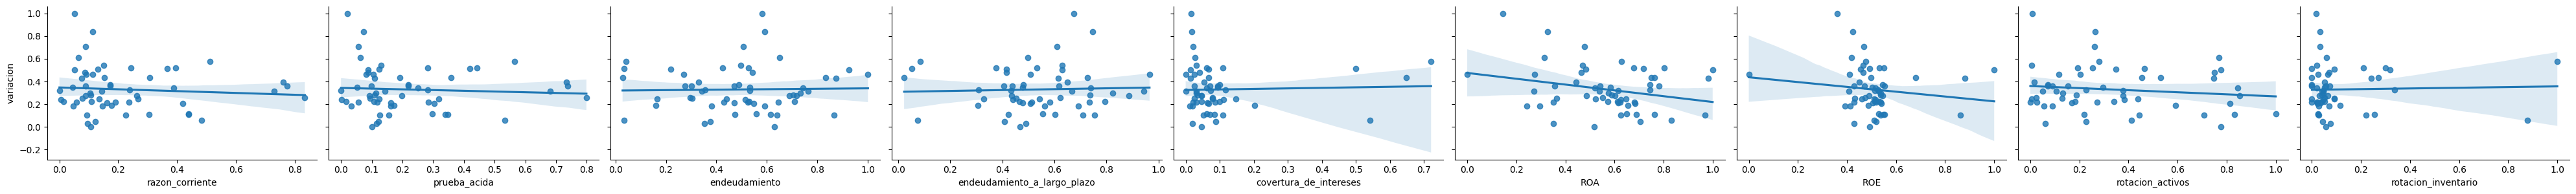

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el correlograma
sns.pairplot(dt_normalized.reset_index(), y_vars=["variacion"], x_vars=features, kind="reg", height=3, aspect=1.5)

# Mostrar el gráfico
plt.show()


In [24]:
dt.isna().sum()

company                         0
razon_corriente                 0
prueba_acida                    0
endeudamiento                   0
endeudamiento_a_largo_plazo     0
covertura_de_intereses          0
ROA                             0
ROE                             0
rotacion_activos                0
rotacion_inventario             0
variacion                      14
dtype: int64

In [27]:
dt_normalized.shape

(56, 11)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


dt_normalized = dt_normalized[dt_normalized["variacion"].notna()]
# Separar las características (X) y el target (y)
X = dt_normalized.drop(columns=["variacion", "company"])
y = dt_normalized["variacion"]

# Dividir los datos en conjuntos de entrenamiento y prueba



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.05372294390598473
R^2 Score: -0.2931042003036859


In [26]:
dt_normalized

,company,razon_corriente,prueba_acida,endeudamiento,endeudamiento_a_largo_plazo,covertura_de_intereses,ROA,ROE,rotacion_activos,rotacion_inventario,variacion
0,3m-co,0.263176,0.197543,0.717497,0.887171,0.046159,0.601601,0.546189,0.378461,0.030282,0.276459
1,3m-co,0.225446,0.154867,0.640590,0.753519,0.051620,0.626945,0.537502,0.443079,0.028287,0.102109
2,3m-co,0.191265,0.117135,0.645710,0.735277,0.031637,0.623552,0.537389,0.272496,0.019423,0.216850
3,3m-co,0.092023,0.081443,1.000000,0.965419,0.025400,0.000000,0.000000,0.202977,0.024887,0.464983
5,YPF,0.047062,0.032662,0.591270,0.693048,0.012499,0.241902,0.392805,0.089867,0.027583,0.186258
6,YPF,0.112184,0.072819,0.591073,0.747294,0.017936,0.328578,0.422710,0.263085,0.034090,0.836609
7,YPF,0.089754,0.056328,0.505766,0.609913,0.022251,0.478315,0.468006,0.262576,0.032741,0.708918
8,YPF,0.051502,0.021706,0.580690,0.673989,0.016486,0.144019,0.359715,0.008886,0.016111,1.000000
10,amazon-com-inc,0.087708,0.092030,0.689083,0.436444,0.047028,0.485986,0.489569,0.852326,0.064711,0.272119
11,amazon-com-inc,0.105706,0.101609,0.628478,0.468436,0.046680,0.516666,0.493370,0.775357,0.057410,0.000000
